In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import time 
import scipy
import investpy
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# Import data

In [30]:
ft = yf.download("TNPC.BK TOA.BK DRT.BK STEC.BK TPOLY.BK SI=F PL=F HG=F",start="2010-01-02",end="2020-08-31")
ft.fillna(method='bfill', inplace=True)
ft = ft.dropna()
ft = ft['Adj Close']
ft.head()

[*********************100%***********************]  8 of 8 completed


,DRT.BK,HG=F,PL=F,SI=F,STEC.BK,TNPC.BK,TOA.BK,TPOLY.BK
Date,,,,,,,,
2010-01-04,1.595847,3.3880,1517.300049,17.440001,3.966286,0.380774,31.100529,1.494060
2010-01-05,1.595847,3.3960,1530.800049,17.781000,3.904311,0.380774,31.100529,1.508023
2010-01-06,1.595847,3.4775,1552.199951,18.163000,3.873323,0.380774,31.100529,1.521985
2010-01-07,1.595847,3.4115,1553.000000,18.333000,3.904311,0.380774,31.100529,1.521985
2010-01-08,1.595847,3.3880,1564.599976,18.458000,3.873323,0.380774,31.100529,1.521985


In [31]:
st = yf.download("PTTEP.BK TVO.BK CPF.BK SCC.BK TNPC.BK",start="2010-01-02",end="2020-08-31")
st.fillna(method='bfill', inplace=True)
st = st.dropna()
st = st['Adj Close']
st.head()

[*********************100%***********************]  5 of 5 completed


,CPF.BK,PTTEP.BK,SCC.BK,TNPC.BK,TVO.BK
Date,,,,,
2010-01-04,7.740198,91.686096,159.190170,0.380774,9.123015
2010-01-05,7.603206,92.628090,159.190170,0.380774,9.123015
2010-01-06,7.740198,93.570053,157.140518,0.380774,9.173982
2010-01-07,7.740198,92.628090,154.407623,0.380774,9.224945
2010-01-08,8.014190,93.256287,155.090866,0.380774,9.275917


In [32]:
PTT = ft.join(st['SCC.BK'])
PTT = PTT.dropna()
PTT

,DRT.BK,HG=F,PL=F,SI=F,STEC.BK,TNPC.BK,TOA.BK,TPOLY.BK,SCC.BK
Date,,,,,,,,,
2010-01-04,1.595847,3.3880,1517.300049,17.440001,3.966286,0.380774,31.100529,1.494060,159.190170
2010-01-05,1.595847,3.3960,1530.800049,17.781000,3.904311,0.380774,31.100529,1.508023,159.190170
2010-01-06,1.595847,3.4775,1552.199951,18.163000,3.873323,0.380774,31.100529,1.521985,157.140518
2010-01-07,1.595847,3.4115,1553.000000,18.333000,3.904311,0.380774,31.100529,1.521985,154.407623
2010-01-08,1.595847,3.3880,1564.599976,18.458000,3.873323,0.380774,31.100529,1.521985,155.090866
...,...,...,...,...,...,...,...,...,...
2020-08-24,6.163235,2.9225,920.799988,26.587999,13.000000,0.700000,39.478291,1.850000,361.000000
2020-08-25,6.211765,2.9310,930.599976,26.254000,13.000000,0.700000,39.230000,1.900000,356.000000
2020-08-26,6.308824,2.9790,936.400024,27.520000,13.200000,0.710000,39.230000,1.940000,351.000000


In [33]:
# df = pd.read_csv('BZ=F.csv')
# df = df.rename(columns={'วันเดือนปี' : 'Date','ล่าสุด' : 'BZ=F'})
# df = df[['BZ=F']]

# PTT = PTT.merge(df)
# PTT

# Visualize the Time Series

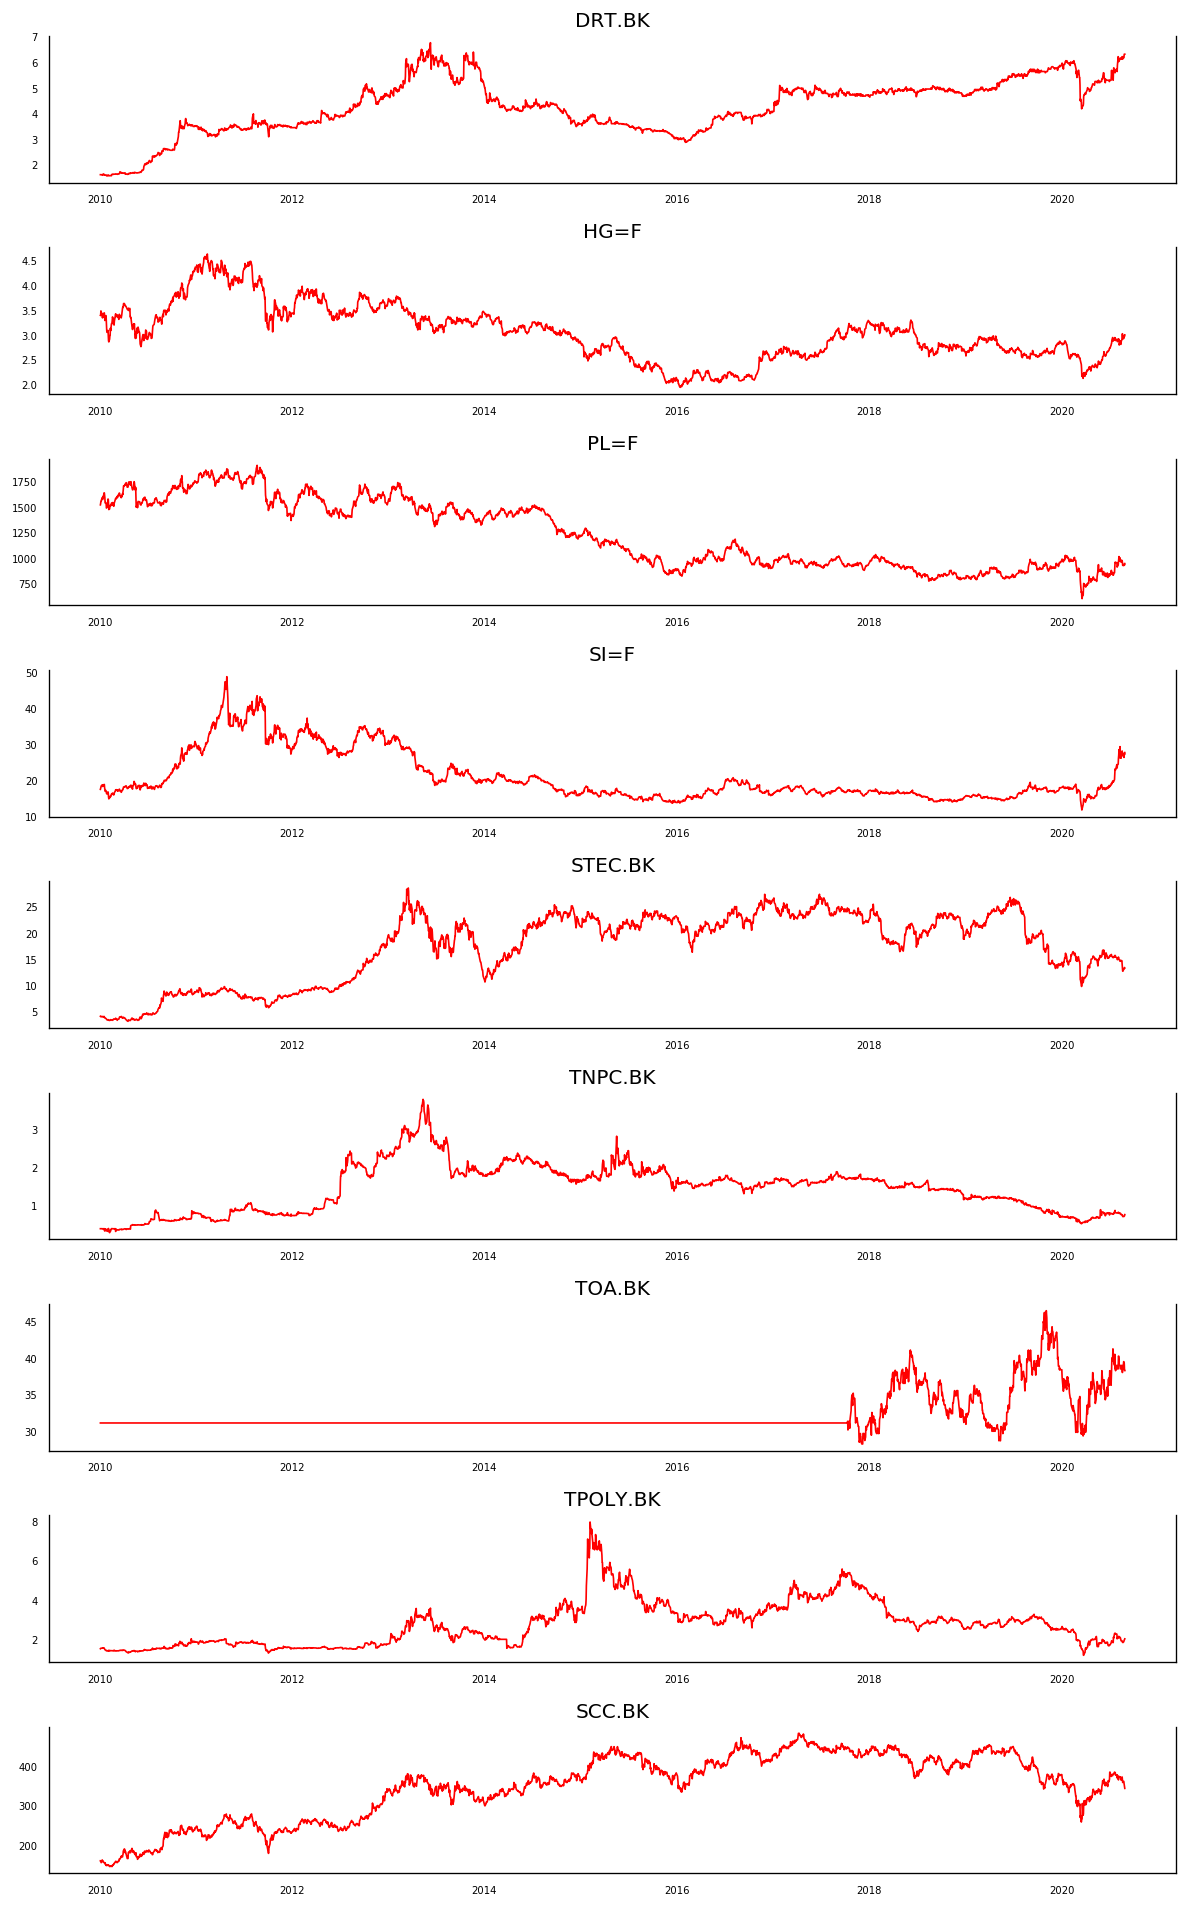

In [34]:
fig, axes = plt.subplots(nrows=len(PTT.columns), ncols=1, dpi=120, figsize=(10,16))
for i, ax in enumerate(axes.flatten()):
    data = PTT[PTT.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(PTT.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Correlation

In [35]:
PTT.corr().loc[['SCC.BK']]

,DRT.BK,HG=F,PL=F,SI=F,STEC.BK,TNPC.BK,TOA.BK,TPOLY.BK,SCC.BK
SCC.BK,0.547293,-0.637295,-0.78001,-0.581209,0.916017,0.476079,0.21497,0.766615,1.0


# Testing Causation using Granger’s Causality Test

In [36]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=24
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    PTT = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in PTT.columns:
        for r in PTT.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            PTT.loc[r, c] = min_p_value
    PTT.columns = [var + '_x' for var in variables]
    PTT.index = [var + '_y' for var in variables]
    return PTT

grangers_causation_matrix(PTT, variables = PTT.columns).loc[['SCC.BK_y']] 

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, bu

,DRT.BK_x,HG=F_x,PL=F_x,SI=F_x,STEC.BK_x,TNPC.BK_x,TOA.BK_x,TPOLY.BK_x,SCC.BK_x
SCC.BK_y,0.0048,0.0001,0.0004,0.0069,0.0079,0.0635,0.0135,0.0754,1.0


# Cointegration Test

In [37]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(PTT, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(PTT,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(PTT.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(PTT)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
DRT.BK ::  166.58    > 179.5199  =>   False
HG=F   ::  110.03    > 143.6691  =>   False
PL=F   ::  79.5      > 111.7797  =>   False
SI=F   ::  49.77     > 83.9383   =>   False
STEC.BK ::  32.82     > 60.0627   =>   False
TNPC.BK ::  19.78     > 40.1749   =>   False
TOA.BK ::  9.36      > 24.2761   =>   False
TPOLY.BK ::  3.07      > 12.3212   =>   False
SCC.BK ::  0.09      > 4.1296    =>   False


# Split the Series into Training and Testing Data

In [38]:
nobs = 7
ft_train, ft_test = PTT[0:-nobs], PTT[-nobs:]

# Check size
print(ft_train.shape)  
print(ft_test.shape)  
ft_train

(2596, 9)
(7, 9)


,DRT.BK,HG=F,PL=F,SI=F,STEC.BK,TNPC.BK,TOA.BK,TPOLY.BK,SCC.BK
Date,,,,,,,,,
2010-01-04,1.595847,3.3880,1517.300049,17.440001,3.966286,0.380774,31.100529,1.494060,159.190170
2010-01-05,1.595847,3.3960,1530.800049,17.781000,3.904311,0.380774,31.100529,1.508023,159.190170
2010-01-06,1.595847,3.4775,1552.199951,18.163000,3.873323,0.380774,31.100529,1.521985,157.140518
2010-01-07,1.595847,3.4115,1553.000000,18.333000,3.904311,0.380774,31.100529,1.521985,154.407623
2010-01-08,1.595847,3.3880,1564.599976,18.458000,3.873323,0.380774,31.100529,1.521985,155.090866
...,...,...,...,...,...,...,...,...,...
2020-08-13,6.114706,2.8040,978.099976,27.694000,14.700000,0.760000,38.485126,1.940000,371.000000
2020-08-14,6.114706,2.8560,954.400024,26.065001,14.500000,0.750000,38.733418,1.900000,364.000000
2020-08-17,6.114706,2.8980,963.299988,27.643000,14.600000,0.750000,38.981709,1.900000,368.000000


# Check for Stationarity and Make the Time Series Stationary

In [39]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [40]:
# ADF Test on each column
for name, column in ft_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DRT.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1857
 No. Lags Chosen       = 20
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.2115. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HG=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7367
 No. Lags Chosen       = 21
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.4123. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "PL=F" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

In [41]:
# 1st difference
ft_differenced = ft_train.diff().dropna()

In [42]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in ft_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DRT.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.4732
 No. Lags Chosen       = 19
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HG=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.0017
 No. Lags Chosen       = 20
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PL=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    =

In [43]:
# # Second Differencing
# ft_differenced = ft_differenced.diff().dropna()

In [44]:
# # ADF Test on each column of 2nd Differences Dataframe
# for name, column in ft_differenced.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

# Select the Order (P) of VAR model

In [45]:
model = VAR(ft_differenced)
for i in list(range(1,24)):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -19.65114469816951
BIC :  -19.447796173559304


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


FPE :  2.9215709919000586e-09
HQIC:  -19.57745792511138 

Lag Order = 2
AIC :  -19.634309332173892
BIC :  -19.247823561126026
FPE :  2.9711790642111e-09
HQIC:  -19.49425693949831 

Lag Order = 3
AIC :  -19.61775781735098
BIC :  -19.048017603430075
FPE :  3.0207815327375414e-09
HQIC:  -19.4112947325565 

Lag Order = 4
AIC :  -19.587771295800454
BIC :  -18.834659320838206
FPE :  3.11276692064028e-09
HQIC:  -19.314852398203296 

Lag Order = 5
AIC :  -19.557469364421042
BIC :  -18.620868188342605
FPE :  3.2085852031288348e-09
HQIC:  -19.218049485085114 

Lag Order = 6
AIC :  -19.55667991695029
BIC :  -18.436471977600345
FPE :  3.2111960172615597e-09
HQIC:  -19.150713838617055 

Lag Order = 7
AIC :  -19.526598463717356
BIC :  -18.222666076685837
FPE :  3.3093710176450244e-09
HQIC:  -19.054040920735584 

Lag Order = 8
AIC :  -19.49436082374687
BIC :  -18.006586182194404
FPE :  3.4179463568546268e-09
HQIC:  -18.955166502002243 

Lag Order = 9
AIC :  -19.464385771619593
BIC :  -17.792650946102

In [46]:
#Lag Order = 3
x = model.select_order(maxlags=4)
x.summary()

,AIC,BIC,FPE,HQIC
0,-19.64,-19.62*,2.944e-09,-19.64*
1,-19.64*,-19.44,2.941e-09*,-19.57
2,-19.63,-19.24,2.986e-09,-19.49
3,-19.61,-19.04,3.030e-09,-19.41
4,-19.59,-18.83,3.113e-09,-19.31


# Train the VAR Model of Selected Order(p)

In [47]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 19, Nov, 2020
Time:                     23:36:18
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -19.2478
Nobs:                     2593.00    HQIC:                  -19.4943
Log likelihood:          -7486.89    FPE:                2.97118e-09
AIC:                     -19.6343    Det(Omega_mle):     2.78223e-09
--------------------------------------------------------------------
Results for equation DRT.BK
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001835         0.001334            1.375           0.169
L1.DRT.BK          -0.051407         0.020493           -2.509           0.012
L1.HG=F             0.066450         0.034989            1.899     

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [48]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(PTT.columns, out):
    print( col,':', round(val, 2))

DRT.BK : 2.0
HG=F : 2.0
PL=F : 2.0
SI=F : 2.0
STEC.BK : 2.0
TNPC.BK : 2.0
TOA.BK : 2.01
TPOLY.BK : 1.99
SCC.BK : 2.0


# Forecast VAR model using statsmodels

In [49]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = ft_differenced.values[-lag_order:]
forecast_input

2


array([[ 9.70587730e-02,  7.29999542e-02,  7.79998779e+00,
         4.06000137e-01, -7.00000763e-01, -9.99999046e-03,
        -4.96582031e-01, -9.99999046e-03,  4.00000000e+00],
       [-9.70587730e-02,  4.80000973e-02, -1.90999756e+01,
        -7.33999252e-01, -8.99999619e-01,  0.00000000e+00,
        -4.96582031e-01, -5.99999428e-02, -8.00000000e+00]])

In [50]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
ft_forecast = pd.DataFrame(fc, index=PTT.index[-nobs:], columns=PTT.columns + '_1d')
ft_forecast


,DRT.BK_1d,HG=F_1d,PL=F_1d,SI=F_1d,STEC.BK_1d,TNPC.BK_1d,TOA.BK_1d,TPOLY.BK_1d,SCC.BK_1d
Date,,,,,,,,,
2020-08-20,-0.003780,-0.002509,-0.364267,0.032411,-0.005568,-0.006246,0.082818,-0.009972,0.181848
2020-08-21,-0.006943,-0.002956,-3.375754,-0.090308,-0.005742,-0.005718,0.008980,0.000923,0.096441
2020-08-24,0.001796,-0.000067,-0.442353,0.007858,0.002733,-0.000039,-0.003794,-0.001184,0.039051
2020-08-25,0.001729,-0.000339,-0.477701,0.003114,0.004406,-0.000595,-0.000483,-0.000049,0.084906
2020-08-26,0.001731,-0.000173,-0.238650,0.003295,0.002887,0.000122,0.003489,0.000097,0.079887
2020-08-27,0.001737,-0.000201,-0.239712,0.003788,0.003437,0.000073,0.002876,0.000111,0.081769
2020-08-28,0.001725,-0.000175,-0.233625,0.003509,0.003507,0.000134,0.002608,0.000120,0.078937


# Invert the transformation to get the real forecast

In [51]:
def invert_transformation(ft_train, ft_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    ft_fc = ft_forecast.copy()
    columns = ft_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            ft_fc[str(col)+'_1d'] = (ft_train[col].iloc[-1]-ft_train[col].iloc[-2]) + ft_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        ft_fc[str(col)+'_forecast'] = ft_train[col].iloc[-1] + ft_fc[str(col)+'_1d'].cumsum()
    return ft_fc

In [52]:
ft_results = invert_transformation(ft_train, ft_forecast, second_diff=False)        
ft_results.loc[:, ["SCC.BK_forecast" ]]

,SCC.BK_forecast
Date,
2020-08-20,364.181848
2020-08-21,364.278289
2020-08-24,364.317340
2020-08-25,364.402247
2020-08-26,364.482133
2020-08-27,364.563903
2020-08-28,364.642840


# Evaluate the Forecasts && Plot of Forecast vs Actuals

Forecast Accuracy of: SCC
mae (Mean Absolute Error) :  10.6955
rmse (Root Mean Square Error) :  12.3764
mape (Mean absolute percentage error) :  3.0553


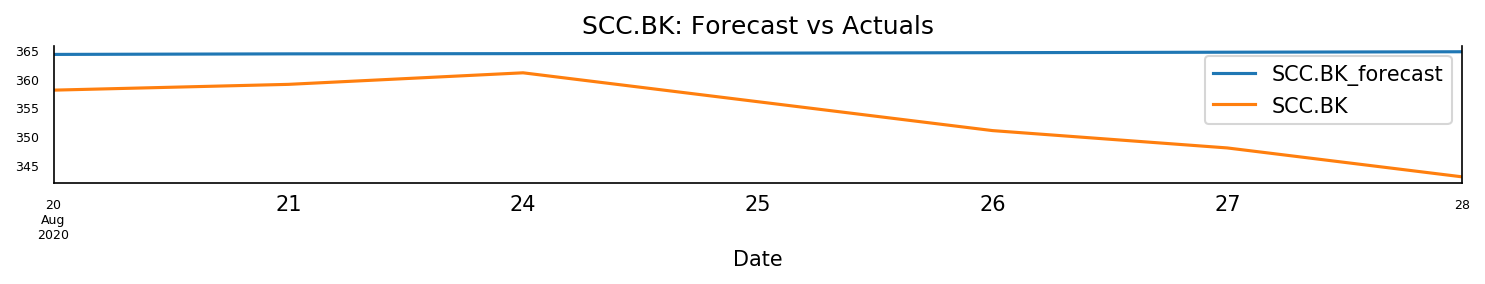

In [53]:


fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(10,2))
ft_results['SCC.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
ft_test['SCC.BK'].plot(legend=True );
axes.set_title('SCC.BK' + ": Forecast vs Actuals")
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')
axes.spines["top"].set_alpha(0)
axes.tick_params(labelsize=6)

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
#  
#     n = train.shape[0]
#     d = np.abs(  np.diff( train) ).sum()/(n-1)
    
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
#     mase = np.mean(np.abs(actual - forecast ))/d
    
#     me = np.mean(forecast - actual)             # ME
#     mpe = np.mean((forecast - actual)/actual)   # MPE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mae (Mean Absolute Error)': mae, 
            'rmse (Root Mean Square Error)':rmse,
            'mape (Mean absolute percentage error)':mape*100})

print('Forecast Accuracy of: SCC')
accuracy_prod = forecast_accuracy(ft_results['SCC.BK_forecast'].values, ft_test['SCC.BK'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
plt.tight_layout();



#  Plot of Forecast vs Actuals ( Forecast 1 year )

In [55]:
start = 0
end = 2441
nobs = 7
max_row = len(PTT) - end

forecast_results = pd.DataFrame()
forecast_test = PTT[end:]


while max_row > 0 :
    if(max_row < nobs):
        ft_train, ft_test = PTT[start:end] , PTT[end:end+max_row]
    else :
        ft_train, ft_test = PTT[start:end] , PTT[end:end+nobs]

    ft_differenced = ft_train.diff().dropna()

    model = VAR(ft_differenced)

    model_fitted = model.fit(2)
    model_fitted.summary()

    lag_order = model_fitted.k_ar

    # Input data for forecasting
    forecast_input = ft_differenced.values[-lag_order:]


    # Forecast
    if(max_row < nobs):
        fc = model_fitted.forecast(y=forecast_input, steps=max_row)
        ft_forecast = pd.DataFrame(fc, index=PTT.index[end:end+max_row], columns=PTT.columns + '_1d')
    else:
        fc = model_fitted.forecast(y=forecast_input, steps=nobs)
        ft_forecast = pd.DataFrame(fc, index=PTT.index[end:end+nobs], columns=PTT.columns + '_1d')


    ft_results = invert_transformation(ft_train, ft_forecast, second_diff=False)        
    ft_results.loc[:, ["SCC.BK_forecast" ]]
    
    forecast_results = forecast_results.append(ft_results) 
    
    if(max_row < nobs):
        start += max_row
        end += max_row
        max_row -= max_row
        break   
        
    start += nobs
    end += nobs
    max_row -= nobs
    



c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-pa

In [56]:
month = 8
day = 28
New_forecast = pd.DataFrame()
for i in range(0,7):
    day += 1
    if(day > 31):
        month +=1
        day=1
    date = '2020'+'-'+str(month)+'-'+str(day)
    new_date = pd.DataFrame(index = [date])
    New_forecast = New_forecast.append(new_date)
    
ft_train = PTT[start:end] 

ft_differenced = ft_train.diff().dropna()

model = VAR(ft_differenced)

model_fitted = model.fit(2)
model_fitted.summary()

lag_order = model_fitted.k_ar

# Input data for forecasting
forecast_input = ft_differenced.values[-lag_order:]


# Forecast
# if(max_row < nobs):
#     fc = model_fitted.forecast(y=forecast_input, steps=max_row)
#     ft_forecast = pd.DataFrame(fc, index=PTT.index[end:end+max_row], columns=PTT.columns + '_1d')
# else:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
ft_forecast_n = pd.DataFrame(fc, index=New_forecast.index[0:7], columns=PTT.columns + '_1d')


ft_results_n = invert_transformation(ft_train, ft_forecast_n, second_diff=False)        
ft_results_n.loc[:, ["SCC.BK_forecast" ]]

forecast_results_n = ft_results_n
forecast_results_n.index.names = ['Date']

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [57]:
forecast_results.loc[:, ["SCC.BK_forecast" ]]

,SCC.BK_forecast
Date,
2020-01-02,377.930973
2020-01-03,377.916730
2020-01-06,378.013491
2020-01-07,378.112838
2020-01-08,378.201377
...,...
2020-08-24,372.367400
2020-08-25,372.444355
2020-08-26,372.519837


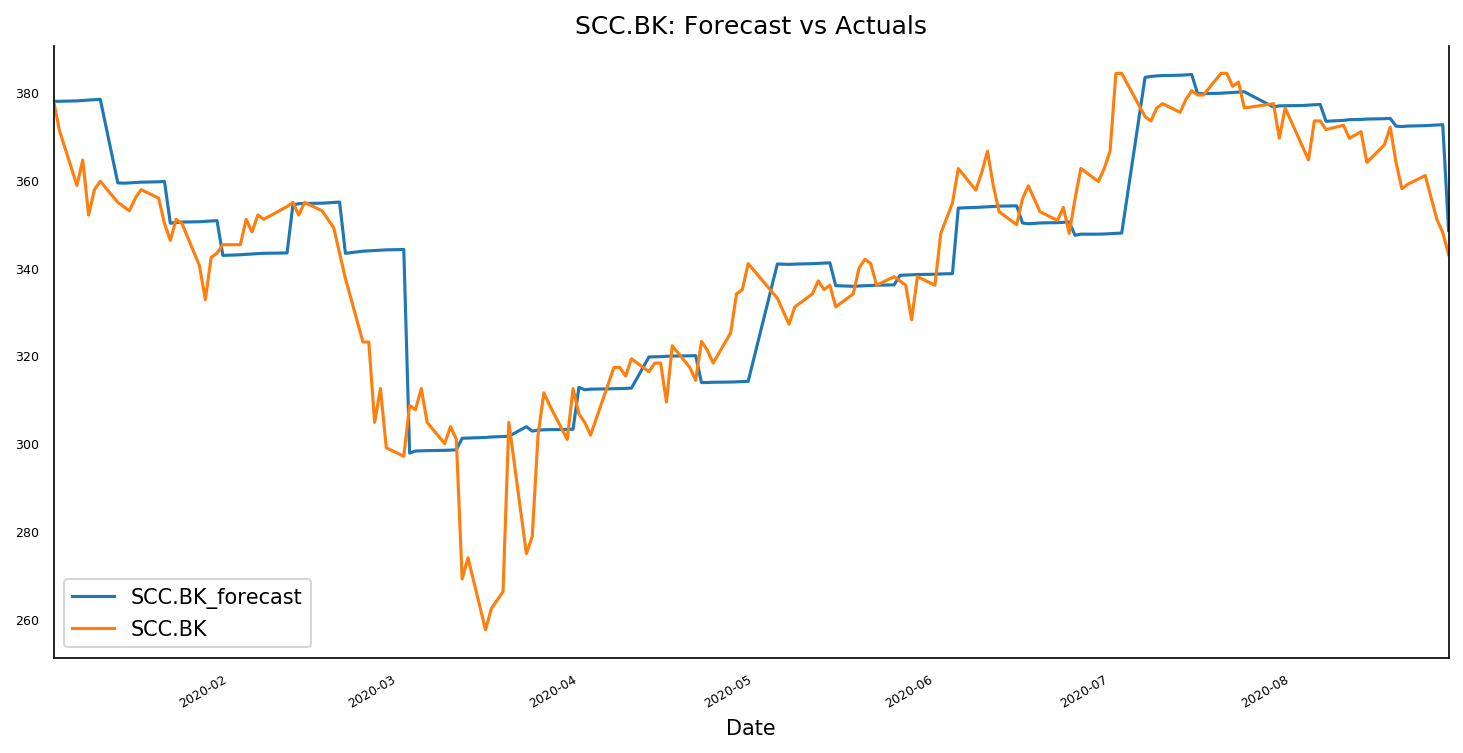

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(12,6))
forecast_results['SCC.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
forecast_test['SCC.BK'].plot(legend=True );
axes.set_title('SCC.BK' + ": Forecast vs Actuals")
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')
axes.spines["top"].set_alpha(0)
axes.tick_params(labelsize=6)

In [59]:
forecast_results_n.loc[:, ["SCC.BK_forecast" ]]

,SCC.BK_forecast
Date,
2020-8-29,343.878894
2020-8-30,344.074441
2020-8-31,344.088206
2020-9-1,344.118367
2020-9-2,344.174670
2020-9-3,344.225390
2020-9-4,344.274129


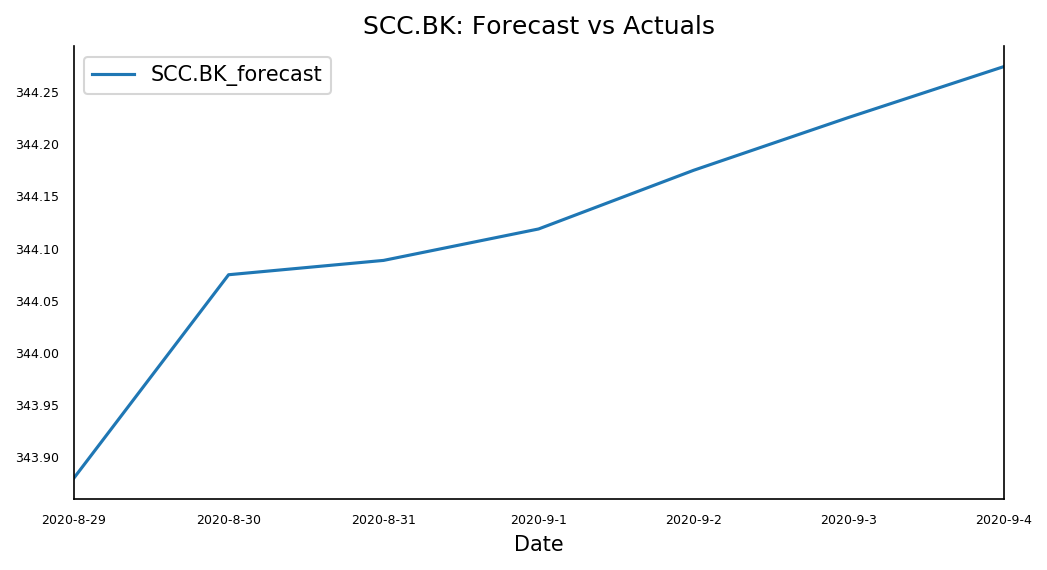

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(8,4))
forecast_results_n['SCC.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
axes.set_title('SCC.BK' + ": Forecast vs Actuals")
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')
axes.spines["top"].set_alpha(0)
axes.tick_params(labelsize=6)

# Evaluate the Forecasts

In [61]:
print('Forecast Accuracy of: SCC\n')
accuracy_prod = forecast_accuracy(forecast_results['SCC.BK_forecast'].values, forecast_test['SCC.BK'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
plt.tight_layout();

Forecast Accuracy of: SCC

mae (Mean Absolute Error) :  9.6908
rmse (Root Mean Square Error) :  13.9318
mape (Mean absolute percentage error) :  2.9817


<Figure size 432x288 with 0 Axes>